In [7]:
import joblib
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [2]:
#Load CSV 

test_data = pd.read_csv(r'F:\Kabir\CSUN\R\testing_data_final.csv')

In [3]:
test_data.head(2)

,sentiment_class,aake,aapki,aapse,abhorrent,ability,abject,able,abomination,abrasive,...,zoo,zoom,zoomedin,zoomers,zooming,zz,zürich,äckligt,åt,punctuation_percent
0,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.06
1,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.08


In [4]:
# Defining class mappings
class_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Extract features (TF-IDF vectors) and labels from test data
X_test = test_data.drop(columns=['sentiment_class'])
y_test = test_data['sentiment_class'].map(class_mapping)

In [21]:
#Loading CatBoost, Random Forest & SVM Models

svm_model = joblib.load(r'F:\Kabir\CSUN\R\svm_model_2.pkl')
rf_model = joblib.load(r'F:\Kabir\CSUN\R\random_forest_model.joblib')
catboost_model = CatBoostClassifier()
catboost_model.load_model(r'F:\Kabir\CSUN\R\catboost_model.dump')


In [22]:
#Predictions

# Perform predictions using each model
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
catboost_preds = catboost_model.predict(X_test)

In [24]:
#Storing into 1 df.
preds_df = pd.DataFrame({
    'SVM': svm_preds.ravel(),  # Ensuring the array is 1-dimensional
    'Random Forest': rf_preds.ravel(),  # Ensuring the array is 1-dimensional
    'CatBoost': catboost_preds.ravel()  # Ensuring the array is 1-dimensional
})

In [25]:
#Max voting
stacking_preds = preds_df.mode(axis=1)[0]


In [28]:
#Evaluation

f1 = f1_score(y_test, stacking_preds, average='weighted')
accuracy = accuracy_score(y_test, stacking_preds)
conf_matrix = confusion_matrix(y_test, stacking_preds)


In [29]:
print("F1 Score:", f1)
print("Accuracy:", accuracy)


F1 Score: 0.7312079623380815
Accuracy: 0.7382352941176471


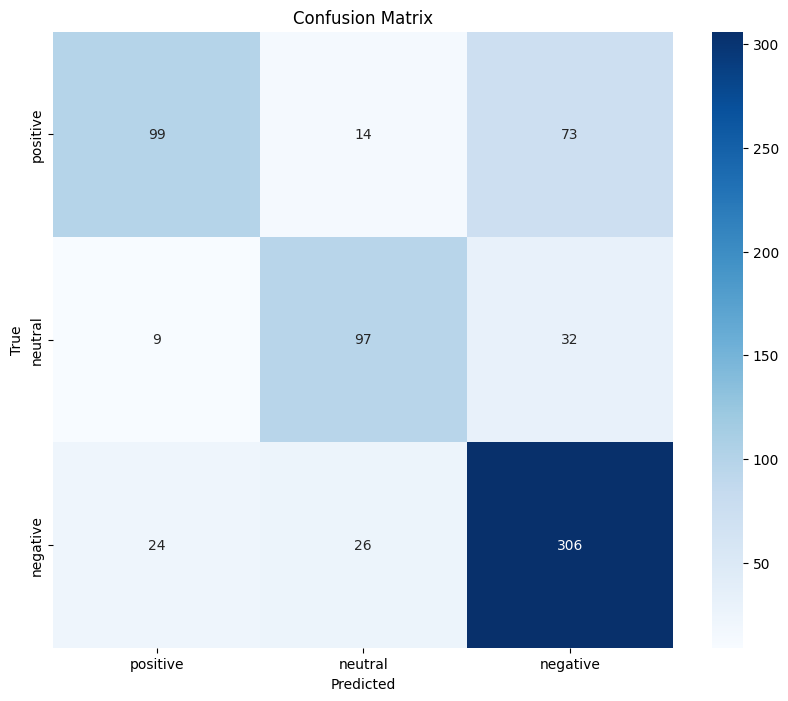

In [31]:
#Plot Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()